In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv('../Data/clean_food_data.csv')

In [106]:
data.head(30)

,market,latitude,longitude,commodity,unit,price,year,month,years_since_start,past_three_months_mean_price,past_six_months_mean_price,past_twelve_months_mean_price,yearly_average_price,monthly_average_price,market_average_price,commodity_yearly_average_price,commodity_monthly_average_price
2,Arusha (urban),-3.366667,36.683333,Beans,100 KG,80714.29,3.302331,1,0,0.000000,0.000000,0.000000,4.740868,5.158213,5.131104,4.769849,5.180923
5,Arusha (urban),-3.366667,36.683333,Beans,100 KG,65083.33,3.302331,2,0,0.000000,0.000000,0.000000,4.740868,5.147702,5.131104,4.769849,5.172144
8,Arusha (urban),-3.366667,36.683333,Beans,100 KG,46875.00,3.302331,3,0,4.807699,0.000000,0.000000,4.740868,5.138472,5.131104,4.769849,5.158918
11,Arusha (urban),-3.366667,36.683333,Beans,100 KG,49136.36,3.302331,4,0,4.729960,0.000000,0.000000,4.740868,5.133740,5.131104,4.769849,5.160248
14,Arusha (urban),-3.366667,36.683333,Beans,100 KG,52346.15,3.302331,5,0,4.694188,0.000000,0.000000,4.740868,5.143850,5.131104,4.769849,5.163703
17,Arusha (urban),-3.366667,36.683333,Beans,100 KG,56375.00,3.302331,6,0,4.721144,4.766574,0.000000,4.740868,5.113005,5.131104,4.769849,5.142721
20,Arusha (urban),-3.366667,36.683333,Beans,100 KG,57000.00,3.302331,7,0,4.742257,4.736152,0.000000,4.740868,5.093668,5.131104,4.769849,5.138807
23,Arusha (urban),-3.366667,36.683333,Beans,100 KG,52000.00,3.302331,8,0,4.741349,4.718408,0.000000,4.740868,5.083604,5.131104,4.769849,5.134770
26,Arusha (urban),-3.366667,36.683333,Beans,100 KG,49187.50,3.302331,9,0,4.722051,4.721598,0.000000,4.740868,5.115876,5.131104,4.769849,5.154006
29,Arusha (urban),-3.366667,36.683333,Beans,100 KG,51010.00,3.302331,10,0,4.705286,4.724165,0.000000,4.740868,5.124358,5.131104,4.769849,5.185441


In [92]:
def handle_outliers(data, column):
    Q3 = data[column].quantile(.75)
    Q1 = data[column].quantile(.25)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [93]:
beans_data = data[data['commodity'] == 'Beans']
lower, upper = handle_outliers(beans_data, 'price')
data.loc[((data['commodity'] == 'Beans') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['commodity'] == 'Beans') & (data['price'] > upper)), 'price'] = upper

In [94]:
data['years_since_start'] = data['year'] - 2006

In [95]:
data.sort_values(by=['market', 'commodity', 'year'], inplace=True)

In [96]:
data['past_three_months_mean_price'] = data.groupby(['market', 'commodity'])['price'].rolling(window=3).mean().reset_index(level=[0, 1], drop=True).fillna(0)

In [97]:
data['past_six_months_mean_price'] = data.groupby(['market', 'commodity'])['price'].rolling(window=6).mean().reset_index(level=[0, 1], drop=True).fillna(0)

In [98]:
data['past_twelve_months_mean_price'] = data.groupby(['market', 'commodity'])['price'].rolling(window=12).mean().reset_index(level=[0, 1], drop=True).fillna(0)

In [99]:
data['yearly_average_price'] = data.groupby(['market', 'commodity', 'year'])['price'].transform('mean')

In [100]:
data['monthly_average_price'] = data.groupby(['market', 'commodity', 'month'])['price'].transform('mean')

In [101]:
data['market_average_price'] = data.groupby(['market', 'commodity'])['price'].transform('mean')

In [102]:
data['commodity_yearly_average_price'] = data.groupby(['commodity', 'year'])['price'].transform('mean')

In [103]:
data['commodity_monthly_average_price'] = data.groupby(['commodity', 'month'])['price'].transform('mean')

In [104]:
data['past_three_months_mean_price'] = np.log10(data['past_three_months_mean_price'] + 0)
data['past_six_months_mean_price'] = np.log10(data['past_six_months_mean_price'] + 0)
data['past_twelve_months_mean_price'] = np.log10(data['past_twelve_months_mean_price'] + 0)
data['yearly_average_price'] = np.log10(data['yearly_average_price'] + 0)
data['monthly_average_price'] = np.log10(data['monthly_average_price'] + 0)
data['market_average_price'] = np.log10(data['market_average_price'] + 0)
data['commodity_yearly_average_price'] = np.log10(data['commodity_yearly_average_price'] + 0)
data['commodity_monthly_average_price'] = np.log10(data['commodity_monthly_average_price'] + 0)
data['year'] = np.log10(data['year'] + 0)

In [105]:
data.replace(-float('inf'), 0, inplace=True)

In [107]:
maize_data = data[data['commodity'] == 'Maize']
beans_data  = data[data['commodity'] == 'Beans']
rice_data  = data[data['commodity'] == 'Rice']

In [108]:
maize_data = pd.get_dummies(maize_data, prefix_sep='_', columns=['market'], dtype=int)
beans_data = pd.get_dummies(beans_data, prefix_sep='_', columns=['market'], dtype=int)
rice_data = pd.get_dummies(rice_data, prefix_sep='_', columns=['market'], dtype=int)

In [109]:
def remove_feature(df):
    column = ['latitude', 'longitude', 'unit', 'commodity']

    columns = list(df.columns)
    for col in column:
        columns.remove(col)
    
    df = df[columns]

    return df

In [110]:
maize_data = remove_feature(maize_data)
beans_data =remove_feature(beans_data)
rice_data = remove_feature(rice_data)

In [111]:
def plot_heatmap(df, name):
    plt.figure(figsize=(12, 8)) 
    correlation = df.corrwith(df['price'])
    sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap of with " + name + " Price")
    plt.show()

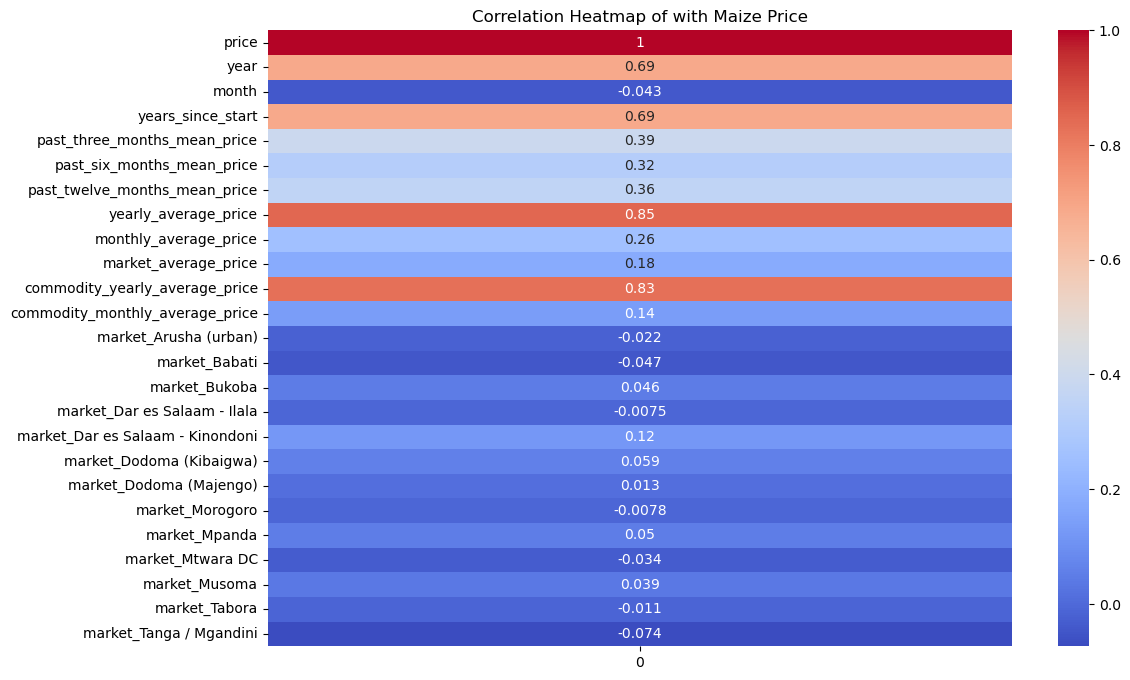

In [112]:
plot_heatmap(maize_data, 'Maize')

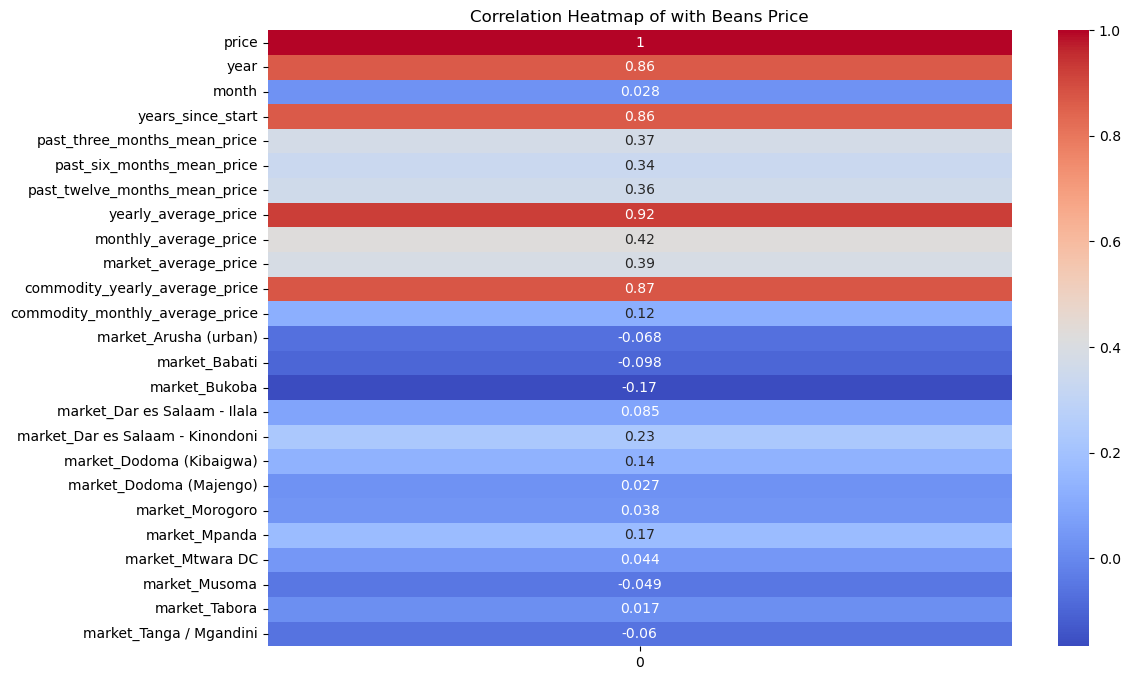

In [113]:
plot_heatmap(beans_data, 'Beans')

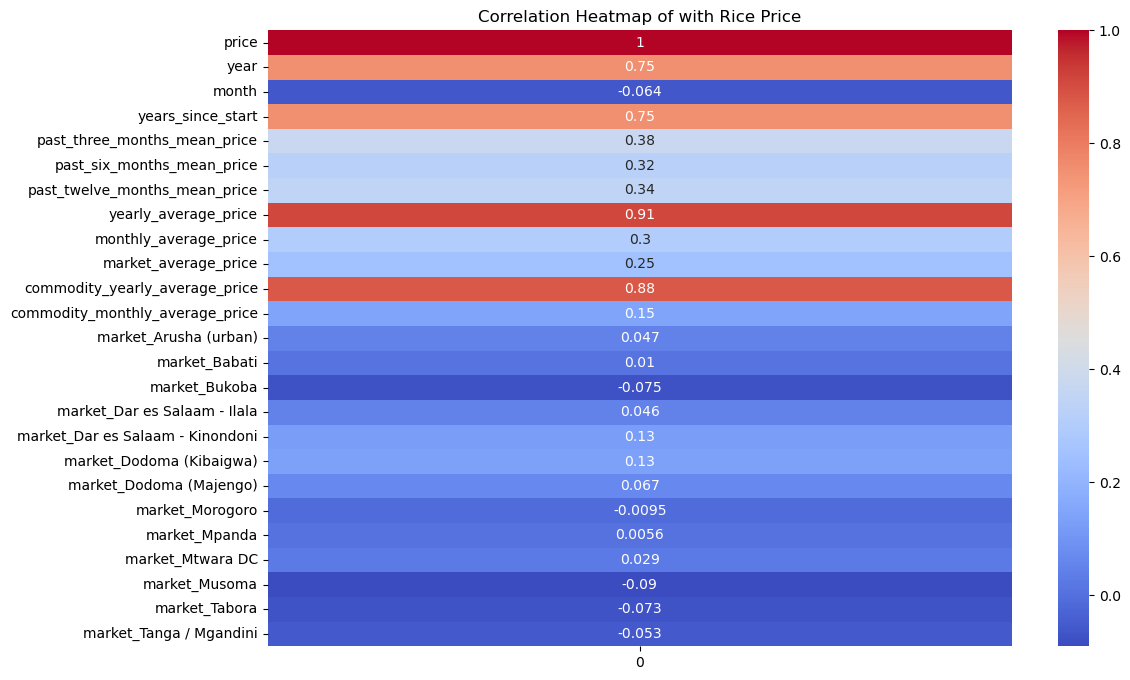

In [114]:
plot_heatmap(rice_data, 'Rice')

In [115]:
maize_data.to_csv('../Data/maize.csv', index=False)
beans_data.to_csv('../Data/beans.csv', index=False)
rice_data.to_csv('../Data/rice.csv', index=False)